In [2]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

black_scholes_call(100, 100, .3, .05, 1)

14.231254785985819

In [6]:
pip install qfin

Note: you may need to restart the kernel to use updated packages.


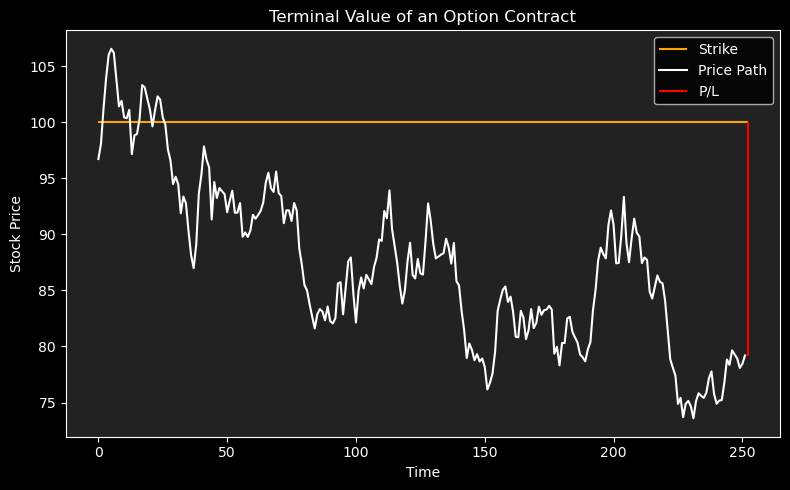

Premium at t=0: 14.231254785985819
P/L: -14.231254785985819


In [10]:
import matplotlib.pyplot as plt
import qfin as qf

# 1) set the dark style first
plt.style.use('dark_background')

# 2) simulate dynamics of the underlying
path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)

# 3) create a figure & axes so we can control facecolors
fig, ax = plt.subplots(figsize=(8, 5), facecolor='black')
ax.set_facecolor('#222222')   # or 'black' if you prefer

# 4) plot
ax.set_title("Terminal Value of an Option Contract")
ax.hlines(100, 0, 252, label='Strike', color='orange')
ax.plot(path.simulated_path, label='Price Path', color='white')

# 5) profit‐and‐loss vertical line
if max(path.simulated_path[-1] - 100, 0) == 0:
    ax.vlines(252, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    ax.vlines(252, 100, path.simulated_path[-1], color='green', label="P/L")

# 6) labels & legend
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
ax.legend()

plt.tight_layout()
plt.show()

# 7) premium and P/L
premium = black_scholes_call(100, 100, .3, .05, 1)
pl = max(path.simulated_path[-1] - 100, 0) - premium
print("Premium at t=0:", premium)
print("P/L:", pl)

In [12]:
# How to Make Money using the Black-Scholes Model
print("Call Price:", black_scholes_call(100, 100, .3, .05, 1))
print("Market Maker Quote:", "13.43 @ 14.10")
print("Trade Edge:", black_scholes_call(100, 100, .3, .05, 1) - 14.10)

Call Price: 14.231254785985819
Market Maker Quote: 13.43 @ 14.10
Trade Edge: 0.13125478598581886


In [14]:
# Computing the P/L Edge with Respect to the Model Dynamics
premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

np.mean(pls)

97.85738180805681

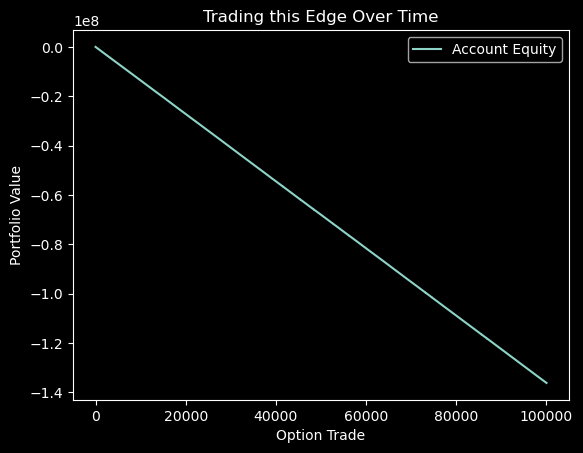

In [16]:
# Simulating an Equity Curve Assuming Underlying Dynamics
premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, -.5, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()